In [ ]:
parameters = {
    'booster' : 'gbtree',
    ''
}
xgb.XGBClassifier()

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import xgboost as xgb

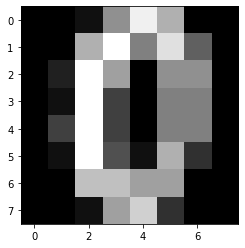

In [2]:
digits=datasets.load_digits()
X = digits.data
y = digits.target

obs=X[10,:];label=y[10];
image=np.array(obs, dtype='uint8').reshape(8,8);
plt.imshow(image, cmap='gray')

### Fonction qui selectionne le 2 chiffre dans le data set

In [3]:
#### choix des digits
def select_two_digit(d1,d2):
    digits=datasets.load_digits()
    X = digits.data
    y = digits.target
    idx = (y == d1) | (y == d2) 
    return X[idx,:], y[idx]
    

In [4]:
X, y = select_two_digit(4,2)

In [5]:
y.shape

(358,)

In [6]:
X.shape

(358, 64)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [8]:
X_train, X_test, y_train, y_test =  train_test_split(X, 
                                                     y, 
                                                     test_size=1/3)
gnb = GaussianNB()
gnbfit = gnb.fit(X_train, y_train)
y_pred = gnbfit.predict(X_test)
E_test = (y_test != y_pred).sum()/len(y_test)
print("Error on the test data set %5.2f ->", E_test)

Error on the test data set %5.2f -> 0.008333333333333333


In [9]:
from sklearn.model_selection import KFold
from sklearn import metrics

In [10]:
X, y = select_two_digit(3,9)

kf = KFold(n_splits= 5,shuffle=True)
accuracy_train, precision_train,recall_train, f1_train =[],[],[],[]
accuracy_test, precision_test,recall_test, f1_test = [],[],[],[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    gnb = GaussianNB()
    gnbfit = gnb.fit(X_train, y_train)
    y_pred = gnbfit.predict(X_test)
    y_pred_train = gnbfit.predict(X_train)
    
    accuracy_train+=[metrics.accuracy_score(y_train,y_pred_train)]
    precision_train+=[metrics.precision_score(y_train,y_pred_train,pos_label=y_train[0])]#,average='micro')]
    recall_train+=[metrics.recall_score(y_train,y_pred_train,pos_label=y_train[0])]#,average='micro')]
    f1_train+=[metrics.f1_score(y_train,y_pred_train,pos_label=y_train[0])]#,average='micro')]
    #auc_train+=[metrics.roc_auc_score(y_train,y_pred_train, average='micro', multi_class='ovo')]
    
    accuracy_test+=[metrics.accuracy_score(y_test,y_pred)]
    precision_test+=[metrics.precision_score(y_test,y_pred,pos_label=y_train[0])]#, average='micro')]
    recall_test+=[metrics.recall_score(y_test,y_pred,pos_label=y_train[0])]#, average='micro')]
    f1_test+=[metrics.f1_score(y_test,y_pred,pos_label=y_train[0])]#, average='micro')]
    #auc_test+=[metrics.roc_auc_score(y_test,y_pred,average='micro',multi_class='ovo')]
    
data = [accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test]
    

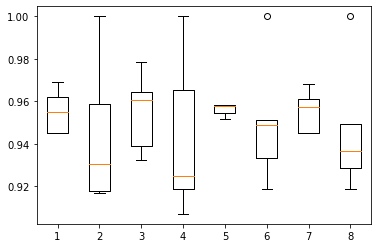

In [11]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [12]:
print(y_pred_train[:20])

[9 3 3 3 9 3 3 3 3 3 3 3 3 3 9 3 9 9 3 9]


In [13]:
print(y_train[:20])

[9 3 9 3 9 9 3 3 3 3 9 3 3 3 9 3 9 9 9 9]


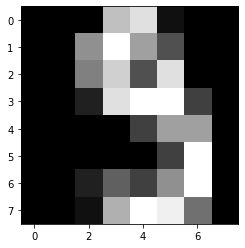

In [14]:
obs=X_train[17,:];label=y[10];
image=np.array(obs, dtype='uint8').reshape(8,8);
plt.imshow(image, cmap='gray')

In [15]:
X, y = select_two_digit(3,9)

############### models###############
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis(n_components=1)
qda=QuadraticDiscriminantAnalysis();
logreg=linear_model.LogisticRegression(C=1e5);
knn=KNeighborsClassifier(n_neighbors=5);
tree = DecisionTreeClassifier(min_samples_split= 30,
                              min_samples_leaf = 10)
bagging = BaggingClassifier(n_estimators=20,
                           base_estimator=tree,
                           random_state=0)
RF = RandomForestClassifier(max_depth=5,
                       random_state=0)

xgb()

models = [gnb, lda, qda, logreg, knn, tree, bagging, RF]
models_name = ['gnb', 'lda', 'qda', 'logreg', 'knn', 'tree', 'bagging', 'RF']

################ kfolds sets ###############
kf = KFold(n_splits= 5,shuffle=True)


data_train = pd.DataFrame(columns = {'gnb' : [],
                               'lda' : [],
                               'qda' : [],
                               'logreg' : [],
                               'knn' : [],
                               'tree' : [],
                               'bagging' : [],
                               'RF' : []})

data_test = pd.DataFrame(columns = {'gnb' : [],
                               'lda' : [],
                               'qda' : [],
                               'logreg' : [],
                               'knn' : [],
                               'tree' : [],
                               'bagging' : [],
                               'RF' : []})
j = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    i = 0
    for x in models:
        x.fit(X_train, y_train)
        #print(x)
        data_test.loc[j,models_name[i]] = metrics.accuracy_score(y_test,x.predict(X_test))
        data_train.loc[j,models_name[i]] = metrics.accuracy_score(y_train,x.predict(X_train))
        i+=1
    #gnbfit = gnb.fit(X_train, y_train)
    #y_pred = gnbfit.predict(X_test)
    #y_pred_train = gnbfit.predict(X_train)
    j+=1
#data = [accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, auc_train, auc_test]

/home/unclevhins/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/unclevhins/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/unclevhins/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/unclevhins/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/unclevhins/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


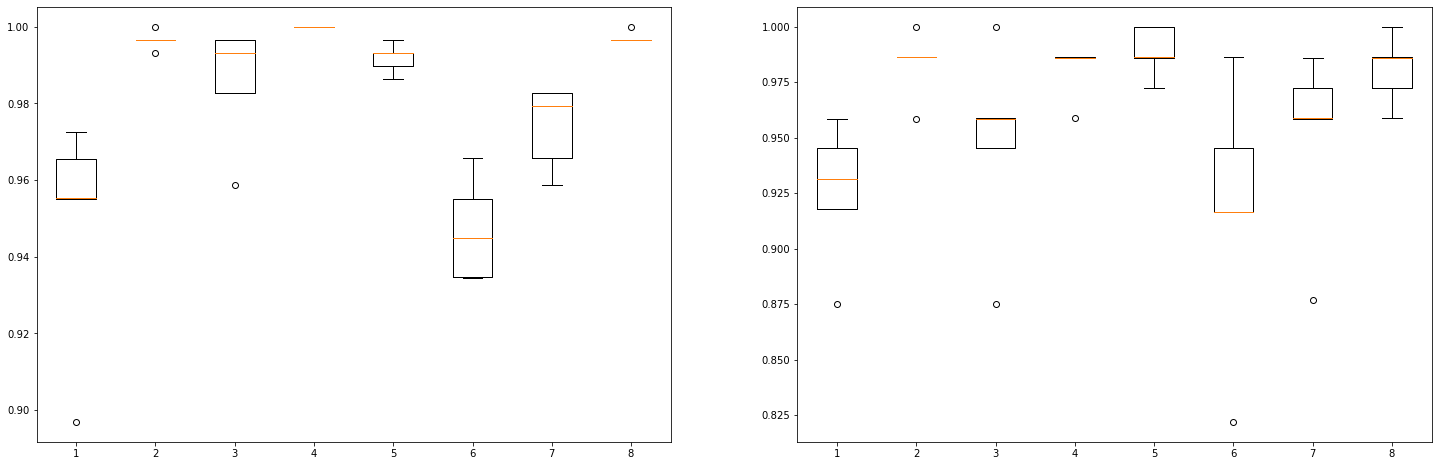

In [16]:
plt.figure(figsize=(25,8))
ax = plt.subplot(121)
ax.boxplot(data_train)
ax = plt.subplot(122)
ax.boxplot(data_test)
plt.show()

In [17]:
data_test

,gnb,lda,qda,logreg,knn,tree,bagging,RF
0,0.931507,0.986301,0.945205,0.986301,0.986301,0.945205,0.972603,1.0
1,0.945205,0.986301,1.0,0.958904,1.0,0.821918,0.876712,0.958904
2,0.917808,0.986301,0.958904,0.986301,0.972603,0.986301,0.958904,0.986301
3,0.875,0.958333,0.875,0.986111,1.0,0.916667,0.986111,0.986111
4,0.958333,1.0,0.958333,0.986111,0.986111,0.916667,0.958333,0.972222


In [21]:
help(xgb)

Help on package xgboost:

NAME
    xgboost - XGBoost: eXtreme Gradient Boosting library.

DESCRIPTION
    Contributors: https://github.com/dmlc/xgboost/blob/master/CONTRIBUTORS.md

PACKAGE CONTENTS
    callback
    compat
    core
    dask
    data
    libpath
    plotting
    rabit
    sklearn
    tracker
    training

CLASSES
    builtins.object
        xgboost.core.Booster
        xgboost.core.DMatrix
            xgboost.core.DeviceQuantileDMatrix
        xgboost.tracker.RabitTracker
    sklearn.base.BaseEstimator(builtins.object)
        xgboost.sklearn.XGBModel
            xgboost.sklearn.XGBClassifier(xgboost.sklearn.XGBModel, sklearn.base.ClassifierMixin)
                xgboost.sklearn.XGBRFClassifier
            xgboost.sklearn.XGBRanker
            xgboost.sklearn.XGBRegressor(xgboost.sklearn.XGBModel, sklearn.base.RegressorMixin)
                xgboost.sklearn.XGBRFRegressor
    
    class Booster(builtins.object)
     |  Booster(params=None, cache=(), model_file=None)
    